In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import json
import os
import pandas as pd
from plotnine import *

In [3]:
METRICS_DIR = '/home/pmccarthy/projects/embedding_study2/metrics'

In [4]:
! ls {METRICS_DIR}

 138de9d1809a133efcc7e357d8ec908c95874f8b_add_small_batch_experiments
 1c0a3a9ae7bde64d106dc635a0143b896139d088_add_skipgram_google_default
 2a7a13a25476442173d8d6fccad62bda88339ed1_add_skipgramv2
 2dbcd2901c4ed9b0db71856ce0c9fe486175e691_add_li2019_generator_experiment
"51ad8085fc0d415e7bbd1a24969a9429a637f133_add_a_test_in_which_we_don't_rely_on_keras_sampling,_but_instead_perform_empirical_positive_sampling_as_Mikolov_lays_out"
 5c8dd5f69ee9c5f0f8f3067fe41c2920f3598e48_cleanup_after_merge
 7b6ed1d57b17a7a8e7ffd6d270afd93ff245410b_add_paper-appropriate_sampling_to_google_default
 93bebc15e98df1fc5eab83cc89ef1090f7b98c3e_add_first_pass_at_testing_code
'c8e0ce636881157d4da79a124cc17d9ba290546f__*_Add_param_to_config.py_allowing_for_a_config_file_to_be_supplied_rather_than_expected__*_add_a_run_to_the_config_in_which_gensim_runs_with_defaults_except_with_a_max_vocab_of_4096.'
 dd664bf49d119b5c9f88e1dece9ceca8ba658e6b_shift_main_functionality_to_allow_calls_from_a_notebook
 e2fb120c7fb4f

In [5]:
def read_single(obj, filename):
    df_obj = {}
    similarities = {}
    
    for k in obj.keys():
        
        if 'similarity' in k:
            similarities[k] = pd.DataFrame(obj[k])
            
    
        elif k == 'benchmarks':
            benchmarks = pd.DataFrame(obj[k]).assign(filename = filename)
            
    df_obj['similarities'] = pd.concat(similarities)
    df_obj['benchmarks'] = benchmarks
    df_obj['filename'] = filename
    df_obj['runtime_seconds'] = obj['runtime_seconds']
    return df_obj

In [10]:
metrics = {}
runs = os.listdir(METRICS_DIR)

for dirname in runs:
    print(dirname)
    metrics[dirname] = {}
    
    for file in os.listdir(os.path.join(METRICS_DIR,dirname)):
        file_path = os.path.join(METRICS_DIR,dirname,file)
        with open(file_path,'r') as f:
            file_name = ".".join(file.split('.')[:-1])
            try:
                metrics[dirname][file] = read_single(json.loads(json.load(f)), file_name)
            except:
                pass


e2fb120c7fb4fb6b3b377c85ad051cdd368ea573_add_param_to_limit_gensim_sequence_length
138de9d1809a133efcc7e357d8ec908c95874f8b_add_small_batch_experiments
51ad8085fc0d415e7bbd1a24969a9429a637f133_add_a_test_in_which_we_don't_rely_on_keras_sampling,_but_instead_perform_empirical_positive_sampling_as_Mikolov_lays_out
5c8dd5f69ee9c5f0f8f3067fe41c2920f3598e48_cleanup_after_merge
93bebc15e98df1fc5eab83cc89ef1090f7b98c3e_add_first_pass_at_testing_code
2a7a13a25476442173d8d6fccad62bda88339ed1_add_skipgramv2
1c0a3a9ae7bde64d106dc635a0143b896139d088_add_skipgram_google_default
dd664bf49d119b5c9f88e1dece9ceca8ba658e6b_shift_main_functionality_to_allow_calls_from_a_notebook
c8e0ce636881157d4da79a124cc17d9ba290546f__*_Add_param_to_config.py_allowing_for_a_config_file_to_be_supplied_rather_than_expected__*_add_a_run_to_the_config_in_which_gensim_runs_with_defaults_except_with_a_max_vocab_of_4096.
7b6ed1d57b17a7a8e7ffd6d270afd93ff245410b_add_paper-appropriate_sampling_to_google_default
2dbcd2901c4ed9b0

In [11]:
metrics = {list(metrics.keys())[3]: metrics[list(metrics.keys())[3]]}

In [12]:
metrics.keys()

dict_keys(['5c8dd5f69ee9c5f0f8f3067fe41c2920f3598e48_cleanup_after_merge'])

In [13]:
benchmarks = []

for dirname in metrics.keys():
    for file in metrics[dirname]:
        benchmarks.append(metrics[dirname][file]['benchmarks'])

benchmark_df =(
    pd.concat(benchmarks)
    .assign(metric_rank = lambda x: x.groupby(['test','metric'])['value'].rank(ascending=False))
    .sort_values('metric_rank')    
    .assign(short_name = lambda x: x['filename'].str.split('_').apply(lambda y: "_".join([z for z in y[:-1]])))
    .drop('filename',axis=1)
)
print(benchmark_df.sort_values(["short_name",'test','metric']).to_markdown())


|    | test       | metric       |      value |   metric_rank | short_name                             |
|---:|:-----------|:-------------|-----------:|--------------:|:---------------------------------------|
|  4 | google     | accuracy     | 0.191513   |             2 | gensim_default                         |
|  2 | simlex999  | pearson_cor  | 0.285576   |             1 | gensim_default                         |
|  3 | simlex999  | spearman_cor | 0.26416    |             1 | gensim_default                         |
|  0 | wordsim353 | pearson_cor  | 0.592314   |             1 | gensim_default                         |
|  1 | wordsim353 | spearman_cor | 0.605971   |             1 | gensim_default                         |
|  4 | google     | accuracy     | 0.00963275 |             4 | google_default                         |
|  2 | simlex999  | pearson_cor  | 0.0233918  |             4 | google_default                         |
|  3 | simlex999  | spearman_cor | 0.012147   |        

In [14]:
print(benchmark_df.sort_values(['metric_rank','test'], ascending=True).to_markdown())

|    | test       | metric       |      value |   metric_rank | short_name                             |
|---:|:-----------|:-------------|-----------:|--------------:|:---------------------------------------|
|  4 | google     | accuracy     | 0.249849   |             1 | skipgramv2_google_small_batch_long_seq |
|  2 | simlex999  | pearson_cor  | 0.285576   |             1 | gensim_default                         |
|  3 | simlex999  | spearman_cor | 0.26416    |             1 | gensim_default                         |
|  1 | wordsim353 | spearman_cor | 0.605971   |             1 | gensim_default                         |
|  0 | wordsim353 | pearson_cor  | 0.592314   |             1 | gensim_default                         |
|  4 | google     | accuracy     | 0.191513   |             2 | gensim_default                         |
|  3 | simlex999  | spearman_cor | 0.210758   |             2 | skipgramv2_google_small_batch_long_seq |
|  2 | simlex999  | pearson_cor  | 0.201829   |        

/opt/conda/envs/emb/lib/python3.7/site-packages/plotnine/facets/facet.py:552: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.
/opt/conda/envs/emb/lib/python3.7/site-packages/plotnine/facets/facet.py:558: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


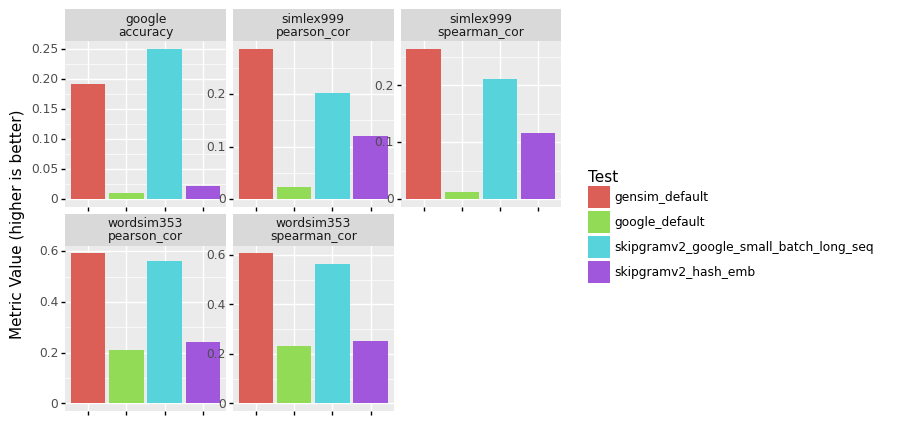

<ggplot: (8730434809237)>

In [15]:
(
    ggplot(benchmark_df, aes(x='short_name',y='value', fill='short_name'))
    + geom_bar(stat='identity')
    + facet_wrap(['test','metric'], scales='free')
    + labs(fill="Test",x="",y="Metric Value (higher is better)")
    + theme(axis_text_x=element_blank())
)

In [16]:
files = []
runtimes = []
for dirname in metrics.keys():
    for file in metrics[dirname]:
        files.append(file)
        runtimes.append(metrics[dirname][file]['runtime_seconds'])        

In [17]:
print(pd.DataFrame({'Test':files, 'Runtime':runtimes}).to_markdown())

|    | Test                                                              |   Runtime |
|---:|:------------------------------------------------------------------|----------:|
|  0 | skipgramv2_google_small_batch_long_seq_20210314T145739767249.json |     20662 |
|  1 | google_default_20210314T145739767249.json                         |       131 |
|  2 | skipgramv2_hash_emb_20210314T145739767249.json                    |     18488 |
|  3 | gensim_default_20210314T145739767249.json                         |       184 |


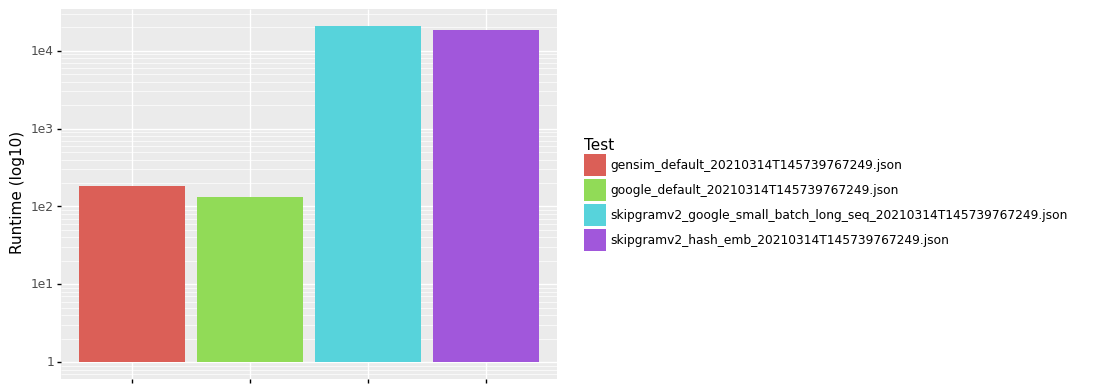

<ggplot: (8730434824293)>

In [18]:
(
    ggplot(pd.DataFrame({'Test':files, 'Runtime':runtimes}), aes(x='Test',y='Runtime',fill='Test'))
    + geom_bar(stat='identity',)
    + labs(fill="Test",x="",y="Runtime (log10)")
    + theme(axis_text_x=element_blank())
    + scale_y_log10()
)

In [19]:
similarities = []
for dirname in metrics.keys():
    for file in metrics[dirname]:
        file_shortname = "_".join(file.split('_')[:-1])
        similarities.append(metrics[dirname][file]['similarities'].assign(file=file_shortname))

In [20]:
print((
    pd.concat(similarities)
    .reset_index()
    .rename(columns={'level_0':'test','level_1':'rank'})
    .query('rank <= 8')
    .drop('cosine_dist',axis=1)
    .pivot(index=['file','rank'],columns='test')
).to_markdown())

|                                               | ('word', 'boat_similarity')   | ('word', 'december_similarity')   | ('word', 'french_similarity')   | ('word', 'street_similarity')   |
|:----------------------------------------------|:------------------------------|:----------------------------------|:--------------------------------|:--------------------------------|
| ('gensim_default', 0)                         | boats                         | march                             | italian                         | avenue                          |
| ('gensim_default', 1)                         | steamer                       | november                          | german                          | boulevard                       |
| ('gensim_default', 2)                         | ship                          | february                          | dutch                           | piccadilly                      |
| ('gensim_default', 3)                         | crews               